In [7]:
import csv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib qt

# def plot_csv(filename):
    # Load the CSV file into a 3D numpy array
if True:
    filename = "cells.csv"
    data_2d = []
    data_3d = []
    data = np.empty((0,0,0,0,0), float)
    
    counter = 0
    with open(filename, 'r') as f:
        reader = csv.reader(f)
        for row in reader:
#             print(row[0:5])
            datarow = list(map(float, row[0:10]))
#             datarow = 
            data_2d.append(datarow)
            counter += 1
            if counter == 20:
                data_3d.append(data_2d)
                data_2d = []
                counter = 0
#             data = np.append(data, datarow, axis=0)
    data_3d = np.array(data_3d)
#     print(data_3d)
    # Create a 3D plot
    fig = plt.figure(dpi=200, figsize = (3, 3))
    ax = fig.add_subplot(111, projection='3d')

    # Get the dimensions of the data
    x_size, y_size, z_size = data_3d.shape
    totcells = x_size*y_size*z_size

    # Create X, Y, and Z arrays for the plot
    X = np.arange(0, x_size, 1)
    Y = np.arange(0, y_size, 1)
    X, Y = np.meshgrid(X, Y)
    Z = data_3d[X, Y]
    cubes = Z>0
    colors = np.empty(Z.shape, dtype=object)
    colors[Z>0] = 'blue'
    colors[Z>totcells] = 'red'
    colors[Z>2*totcells] = 'green'
    
    
    # Plot the surface
#     ax.plot_surface(X, Y, Z)
#     ax.voxels(Z)
    ax.voxels(Z, facecolors = colors, edgecolor='k')
    
    # Add labels and a title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('3D Plot')
    ax.view_init(140,260,90)

    # Show the plot
    plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'cells.csv'

In [247]:
totcells

4000

In [261]:
K = Z[Z>0]
sum(K<50)

2

In [223]:
20*20*5

2000

In [148]:
plot_csv("cells.csv")

TypeError: object of type 'NoneType' has no len()

In [153]:
import csv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def plot_csv(filename):
    # Load the CSV file into a 3D numpy array
    data = np.empty((0,0,0), float)
    with open(filename, 'r') as f:
        reader = csv.reader(f)
        for row in reader:
            # Check for empty row
            if row:
                print(row)
                data = np.append(data, [list(map(float, row))], axis=0)

    # Create a 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Get the dimensions of the data
    x_size, y_size, z_size = data.shape

    # Create X, Y, and Z arrays for the plot
    X = np.arange(0, x_size, 1)
    Y = np.arange(0, y_size, 1)
    X, Y = np.meshgrid(X, Y)
    Z = data[X, Y]

    # Plot the surface
    ax.plot_surface(X, Y, Z)

    # Add labels and a title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('3D Plot')

    # Show the plot
    plt.show()


In [8]:
plot_csv("cells.csv")

['0', '0', '0', '0', '0', '']


ValueError: could not convert string to float: ''

{(0, 0, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fb0ca935cf0>,
 (0, 0, 7): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fb0c8f88be0>,
 (0, 1, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fb0c8f8a4d0>,
 (0, 1, 7): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fb0c8f8a860>,
 (0, 2, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fb0c8f8abf0>,
 (0, 2, 7): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fb0c8f571c0>,
 (0, 3, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fb0c8f55840>,
 (0, 3, 7): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fb0c8f54c70>,
 (0, 4, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fb0c8f3cd30>,
 (0, 4, 7): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fb0c8f3c9a0>,
 (0, 5, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fb0c8f8b190>,
 (0, 5, 7): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fb0c8f8b520>,
 (0, 6, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7fb0c8f8b8b0>,

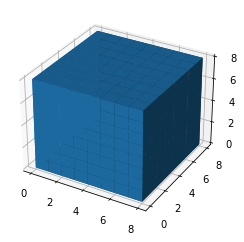

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
data = np.ones([8, 8, 8])

ax.voxels(data)

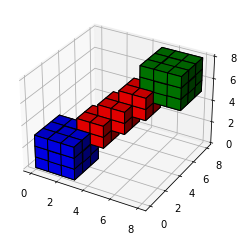

In [168]:
# prepare some coordinates
x, y, z = np.indices((8, 8, 8))

# draw cuboids in the top left and bottom right corners, and a link between
# them
cube1 = (x < 3) & (y < 3) & (z < 3)
cube2 = (x >= 5) & (y >= 5) & (z >= 5)
link = abs(x - y) + abs(y - z) + abs(z - x) <= 2

# combine the objects into a single boolean array
voxelarray = cube1 | cube2 | link

# set the colors of each object
colors = np.empty(voxelarray.shape, dtype=object)
colors[link] = 'red'
colors[cube1] = 'blue'
colors[cube2] = 'green'

# and plot everything
ax = plt.figure().add_subplot(projection='3d')
ax.voxels(voxelarray, facecolors=colors, edgecolor='k')

plt.show()

In [163]:
voxelarray

array([[[ True,  True,  True, False, False, False, False, False],
        [ True,  True,  True, False, False, False, False, False],
        [ True,  True,  True, False, False, False, False, False],
        [False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False]],

       [[ True,  True,  True, False, False, False, False, False],
        [ True,  True,  True, False, False, False, False, False],
        [ True,  True,  True, False, False, False, False, False],
        [False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False],
        

In [152]:
colors

array([[['blue', 'blue', 'blue', None, None, None, None, None],
        ['blue', 'blue', 'blue', None, None, None, None, None],
        ['blue', 'blue', 'blue', None, None, None, None, None],
        [None, None, None, None, None, None, None, None],
        [None, None, None, None, None, None, None, None],
        [None, None, None, None, None, None, None, None],
        [None, None, None, None, None, None, None, None],
        [None, None, None, None, None, None, None, None]],

       [['blue', 'blue', 'blue', None, None, None, None, None],
        ['blue', 'blue', 'blue', None, None, None, None, None],
        ['blue', 'blue', 'blue', None, None, None, None, None],
        [None, None, None, None, None, None, None, None],
        [None, None, None, None, None, None, None, None],
        [None, None, None, None, None, None, None, None],
        [None, None, None, None, None, None, None, None],
        [None, None, None, None, None, None, None, None]],

       [['blue', 'blue', 'blue',